In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取 w-petroprice 石油价格
raw_data = []
with open("../ftsdata/q-ko-earns8309.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        line = line.strip("\n").strip(" ").replace("\t", " ").split(" ")
        line = list(filter(lambda x: x != "", line))
        raw_data.append(line)
data = pd.DataFrame(raw_data[1:], columns=raw_data[0])


# 处理数据格式
data["pends"] = pd.to_datetime(data["pends"], format="%Y%m%d")
data["anntime"] = pd.to_datetime(data["anntime"], format="%Y%m%d")
data["value"] = pd.to_numeric(data["value"])
data.head()

In [ ]:
import plotly.graph_objects as go

# 假设 ko_Rqtr 已经是 DataFrame，且索引为日期
fig = go.Figure()
# 添加线条图
fig.add_trace(go.Scatter(x=data["pends"], y=data['value'], mode='lines', name='Coca Kola Quarterly Return'))

# 设置图表标题和标签
fig.update_layout(title='Coca Kola Quarterly Return', xaxis_title='Date', yaxis_title='Value')

# 显示图表
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


cola = pd.DataFrame(data[["pends", "value"]])
plt.figure(figsize=(12, 6))
plt.plot(cola["pends"], cola['value'], label='Coca Kola Quarterly Return', color='green')
plt.title('Coca Kola Quarterly Return', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).year))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
cola.head()

In [ ]:
data['Date'] = pd.to_datetime(data['pends'])
data.set_index('Date', inplace=True)

# 计算年份和季度
data['Year'] = data.index.year
data['Quarter'] = data.index.quarter

# 定义季度对应的颜色
cpal = ['green', 'red', 'yellow', 'black']

# 绘制季度返回图
plt.figure(figsize=(6, 6))

# 绘制线图
plt.plot(data.index, data['value'], label='Coca Kola Quarterly Return', color='gray')

# 添加季度的散点图
for i, row in data.iterrows():
    plt.scatter(row.name, row['value'], color=cpal[row['Quarter'] - 1], s=50)

plt.title('Coca Kola Quarterly Return', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.grid(True)

# 添加图例
quarter_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
plt.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cpal[i], markersize=10) for i in range(4)],
           quarter_labels,
           title='Quarter')

plt.show()

### 标普500指数月对数收益率

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取 w-petroprice 石油价格
raw_data = []
with open("../ftsdata/m-ibmsp-2611.txt", "r", encoding="utf-8") as file:
    for line in file.readlines():
        line = line.strip("\n").strip(" ").replace("\t", " ").split(" ")
        line = list(filter(lambda x: x != "", line))
        raw_data.append(line)
data = pd.DataFrame(raw_data[1:], columns=raw_data[0])


# 处理数据格式
data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data["ibm"] = pd.to_numeric(data["ibm"])
data["sp"] = pd.to_numeric(data["sp"])
data.head()

,date,ibm,sp
0,1926-01-30,-0.010381,0.022472
1,1926-02-27,-0.024476,-0.043956
2,1926-03-31,-0.115591,-0.059113
3,1926-04-30,0.089783,0.022688
4,1926-05-28,0.036932,0.007679


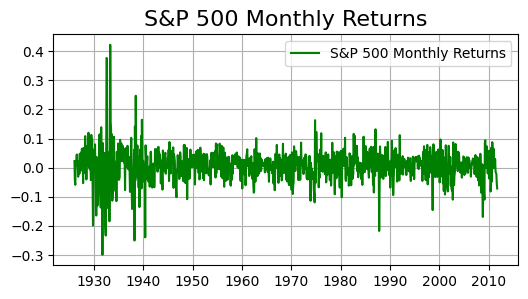

In [ ]:
# cola = pd.DataFrame(data[["pends", "value"]])
plt.figure(figsize=(6, 3))
plt.plot(data["date"], data['sp'], label='S&P 500 Monthly Returns', color='green')
plt.title('S&P 500 Monthly Returns', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()
